<a href="https://colab.research.google.com/github/BogachevAD/tips-analysis-deep/blob/main/tips_deep_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = sns.load_dataset('tips')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
group_a = df[(df['sex'] == 'Male') & (df['time'] == 'Dinner')]
group_b = df[(df['sex'] == 'Female') & (df['time'] == 'Lunch')]
group_a.reset_index(drop=True, inplace=True)
group_b.reset_index(drop=True, inplace=True)



In [8]:
group_a['tip_ratio'] = group_a['tip'] / group_a['total_bill']
group_b['tip_ratio'] = group_b['tip'] / group_b['total_bill']

<ipython-input-8-4230928463>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['tip_ratio'] = group_a['tip'] / group_a['total_bill']
<ipython-input-8-4230928463>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['tip_ratio'] = group_b['tip'] / group_b['total_bill']


In [10]:
group_a.head(), group_b.head()

(   total_bill   tip   sex smoker  day    time  size  tip_ratio
 0       10.34  1.66  Male     No  Sun  Dinner     3   0.160542
 1       21.01  3.50  Male     No  Sun  Dinner     3   0.166587
 2       23.68  3.31  Male     No  Sun  Dinner     2   0.139780
 3       25.29  4.71  Male     No  Sun  Dinner     4   0.186240
 4        8.77  2.00  Male     No  Sun  Dinner     2   0.228050,
    total_bill   tip     sex smoker   day   time  size  tip_ratio
 0       10.07  1.83  Female     No  Thur  Lunch     1   0.181728
 1       34.83  5.17  Female     No  Thur  Lunch     4   0.148435
 2       10.65  1.50  Female     No  Thur  Lunch     2   0.140845
 3       12.43  1.80  Female     No  Thur  Lunch     2   0.144811
 4       24.08  2.92  Female     No  Thur  Lunch     4   0.121262)

In [11]:
print("Средняя доля чаевых (группа A):", group_a['tip_ratio'].mean())
print("Средняя доля чаевых (группа B):", group_b['tip_ratio'].mean())

Средняя доля чаевых (группа A): 0.15540652591483875
Средняя доля чаевых (группа B): 0.1622849271090184


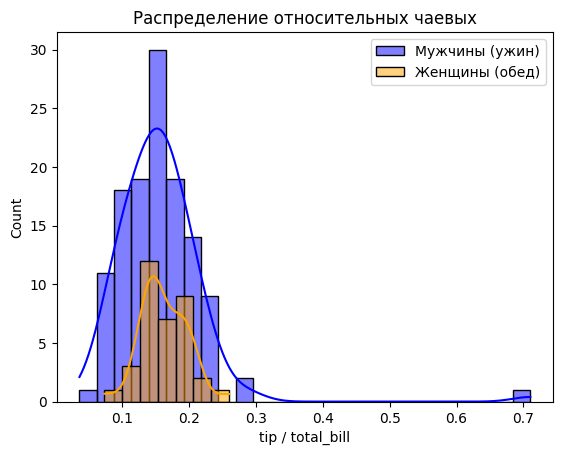

In [12]:
sns.histplot(group_a['tip_ratio'], color='blue', label='Мужчины (ужин)', kde=True)
sns.histplot(group_b['tip_ratio'], color='orange', label='Женщины (обед)', kde=True)
plt.title("Распределение относительных чаевых")
plt.xlabel("tip / total_bill")
plt.legend()
plt.show()